# Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [816]:
import numpy as np
import pandas as pd

In [817]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [818]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [819]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [820]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [821]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [822]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [823]:
len(train)

891

In [824]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [825]:
train['is_test'] = 0
test['is_test'] = 1

In [826]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [827]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [828]:
import re

RARE_TITLES = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

# создаем словарь для исправления префиксов имени
TITLES = dict((title, 'Rare') for title in RARE_TITLES)

TITLES['Mlle'] = 'Miss'
TITLES['Ms'] = 'Miss'
TITLES['Mme'] = 'Mrs'

def get_title(name):
    """ Возвращает префикс имени """
    match = re.search(' ([A-Za-z]+)\.', name)
    if match:
        # исправляем опечатки в префиксе имени
        return TITLES.get(match.group(1), match.group(1))
    return ''

# Применяем процесс для обучающего и тестового наборов
for dataset in [df]:
    # длина имени
#     dataset['Name_Length'] = train['Name'].apply(len)
    # была ли каюта у пассажира
    dataset['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    # сколько членов семьи было на корабле
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    # флаг = 1, если путешествует в одиночестве
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    # заполняем пропуски для Embarked
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    # заполняем индексами
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    # заполняем пропуски Fare медианой
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    # заполняем пропуски возраста медианой
    dataset['Age'] = dataset['Age'].fillna(train['Age'].median())
    # добавляем префикс имени как отдельный категориальный признак
    dataset['Title'] = dataset['Name'].apply(get_title)
    dataset['Title'] = dataset['Title'].map( {'Mr': 1, 
                                              'Miss': 2, 
                                              'Mrs': 3,
                                              'Master': 4,
                                              'Rare': 5} )
    # заполняем неизвестные префиксы нулями
    dataset['Title'] = dataset['Title'].fillna(0)
    # бинаризуем пол
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    # категоризируем стоимость билета
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    # категоризируем возраст
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [829]:
# df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Name","Sex", "Cabin", "Ticket", "PassengerId","Embarked"], axis=1, inplace=True)

In [830]:
# addresses = ['Miss', 'Sir', 'Master', 'Mrs', 'Ms', 'Mr' ]
# dfAd = pd.DataFrame()
# for a in addresses:
#     dfAd[a] = pd.Series(0, index=df.index)

In [831]:
# df = pd.concat([df, dfAd], axis=1, join_axes=[df.index])
# df.head()

In [832]:
# data = {}

# def findAddressing(s ):
#     global addresses
# #     print(s)
#     match = next((x for x in addresses if x in s.Name), 'delete')
#     s[match] = 1
# #     print(match)
#     return s
        
    

In [833]:
# df = df.apply(findAddressing, axis=1) #Mr., Sir, Esq., а по отношению к женщине - Mrs., Ms., Miss, Madam.


In [834]:
# df.drop('delete', axis=1, inplace=True)

In [835]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,is_test,Has_Cabin,FamilySize,IsAlone,Title
0,3,1.0,1,0,0,0,0,2,0,1
1,1,2.0,1,0,3,0,1,2,0,3
2,3,1.0,0,0,1,0,0,1,1,2
3,1,2.0,1,0,3,0,1,2,0,3
4,3,2.0,0,0,1,0,0,1,1,1


In [836]:
# df.drop(["Name"], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [837]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Age', 'Fare', 'Title', "FamilySize"])#, 'Embarked'])

In [838]:
df_dummies.head()

,SibSp,Parch,is_test,Has_Cabin,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,Age_1.0,...,Title_5,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [839]:
df_dummies.isnull().sum()

SibSp            0
Parch            0
is_test          0
Has_Cabin        0
IsAlone          0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Age_0.0          0
Age_1.0          0
Age_2.0          0
Age_3.0          0
Age_4.0          0
Fare_0           0
Fare_1           0
Fare_2           0
Fare_3           0
Title_1          0
Title_2          0
Title_3          0
Title_4          0
Title_5          0
FamilySize_1     0
FamilySize_2     0
FamilySize_3     0
FamilySize_4     0
FamilySize_5     0
FamilySize_6     0
FamilySize_7     0
FamilySize_8     0
FamilySize_11    0
dtype: int64

### Заполнение пустых значений

заполним пустые значения средними по соответственным признакам

In [840]:
df_no_test = df_dummies.iloc[:, df_dummies.columns != "is_test"]

In [841]:
from sklearn.preprocessing import Imputer

In [842]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [843]:
imputer.fit(df_no_test)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [844]:
X_no_test_imputed = imputer.transform(df_no_test)
X_no_test_imputed = pd.DataFrame(X_no_test_imputed, columns=df_no_test.columns)

In [845]:
X_no_test_imputed.head()

,SibSp,Parch,Has_Cabin,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,Age_1.0,Age_2.0,...,Title_5,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Нормировка значений

In [846]:
from sklearn.preprocessing import StandardScaler

In [847]:
scaler = StandardScaler()

In [848]:
scaler.fit(X_no_test_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [849]:
# X_no_test_imputed_scaled = scaler.transform(X_no_test_imputed)
# X_no_test_imputed_scaled = pd.DataFrame(X_no_test_imputed_scaled, columns=X_no_test_imputed.columns)

In [850]:
X_no_test_imputed_scaled = X_no_test_imputed

In [851]:
X_no_test_imputed_scaled.head(10)

,SibSp,Parch,Has_Cabin,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,Age_1.0,Age_2.0,...,Title_5,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Offtop: попробуем визуализировать всех пассажиров: есть ли там кластеры?
### PCA + clustering

In [852]:
from sklearn.decomposition import PCA

In [853]:
pca = PCA(n_components=2)

In [854]:
ppl = pca.fit_transform(X_no_test_imputed_scaled)

In [855]:
ppl

array([[ 0.26583811,  0.92402021],
       [ 0.99370848, -1.32141916],
       [-0.85284223,  0.47418414],
       ..., 
       [-0.97637243,  0.31505647],
       [-1.05159576,  0.58738112],
       [ 1.18759259,  0.39462427]])

всего 2 фичи объясняют 41% всего разнообразия пассажиров:

In [856]:
pca.explained_variance_ratio_.sum()

0.45267111067164151

классно, видно 2 кластеров пассажиров: внутри кластера они похожи друг на друга, межу кластерами - нет:

Text(0.5,1,'Пассажиры Титаника')

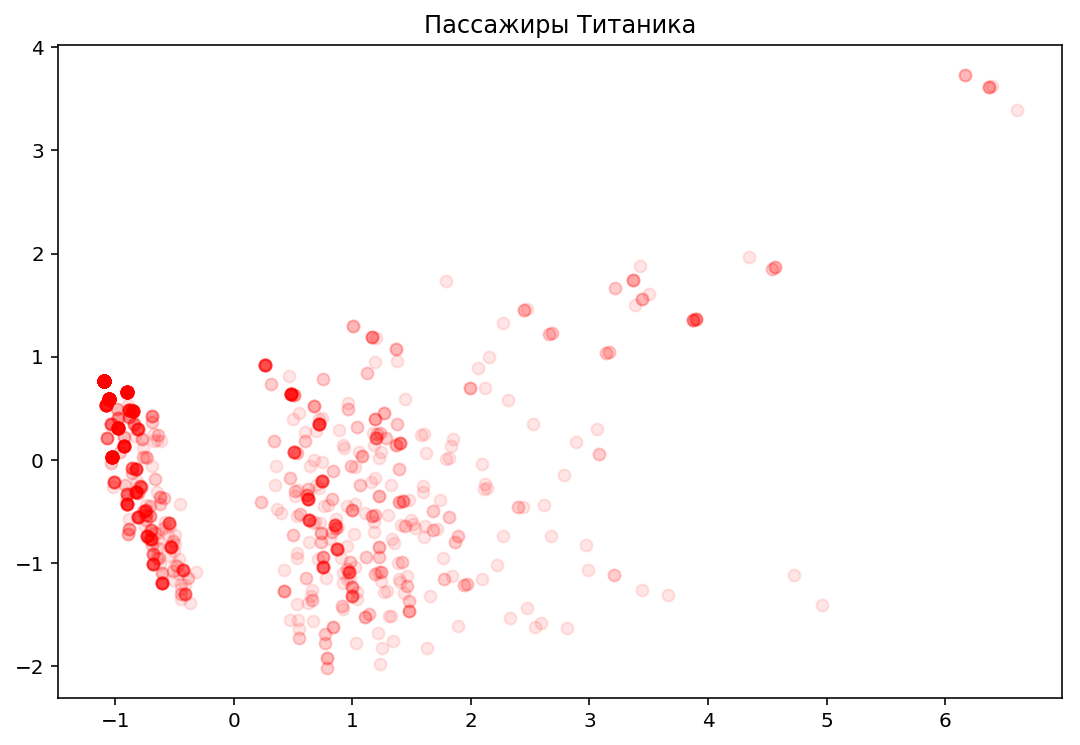

In [857]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

можно попробовать кластеризовать по 7 кластерам и проверить, что получится:

In [858]:
from sklearn.cluster import KMeans

In [860]:
n_clusters = 2

In [861]:
kmeans = KMeans(n_clusters=n_clusters)

In [862]:
kmeans.fit(X_no_test_imputed_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [863]:
cluster_labels = kmeans.predict(X_no_test_imputed_scaled)

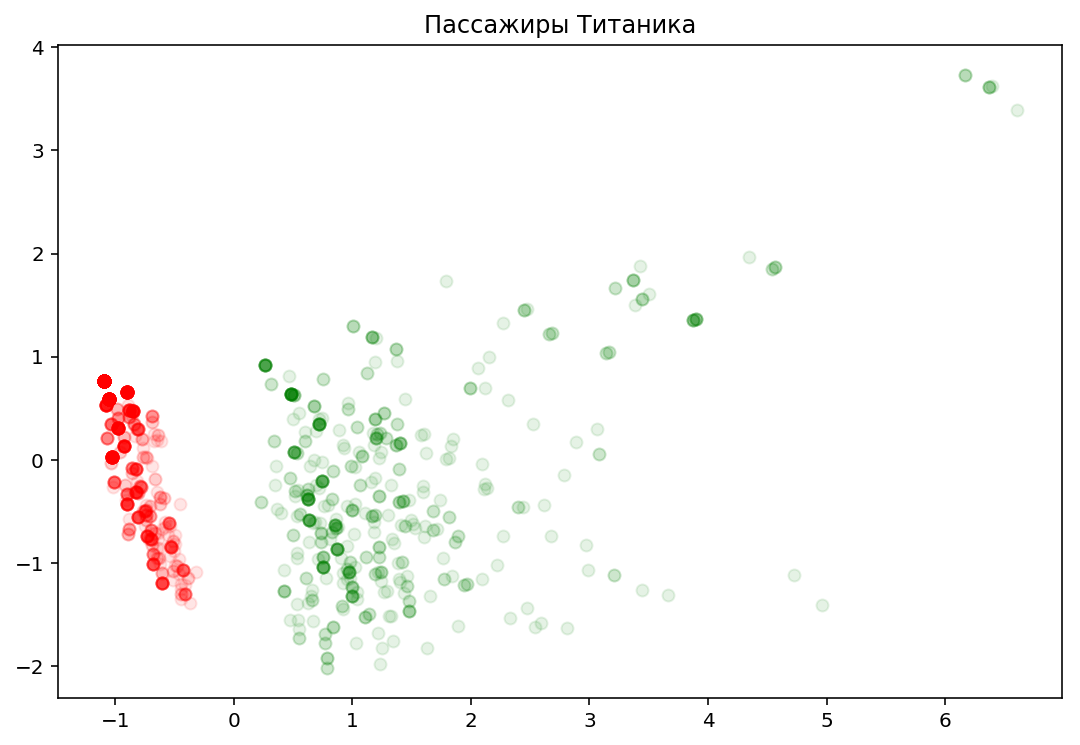

In [864]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

In [865]:
X_no_test_imputed_scaled["clusters"] = cluster_labels
X_no_test_imputed_scaled = pd.get_dummies(X_no_test_imputed_scaled, columns=["clusters"])
X_no_test_imputed_scaled.head()

,SibSp,Parch,Has_Cabin,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,Age_1.0,Age_2.0,...,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,clusters_0,clusters_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [866]:
a_train = pd.Series(df_dummies.is_test==0)
a_test = pd.Series(df_dummies.is_test==1)

In [867]:
X_train = X_no_test_imputed_scaled[a_train.values] #.drop('is_test', axis=1) df[df.columns[df2]]
X_test = X_no_test_imputed_scaled[a_test.values]#.drop('is_test', axis=1)

In [868]:
X_train.to_csv("titanic_cleaned_train.csv", index = False)
y_train.to_csv("titanic_cleaned_train_y.csv", index = False, header=False)
X_test.to_csv("titanic_cleaned_test.csv", index = False)
# y_test.to_csv("titanic_cleaned_test_y.csv", index = False)

In [869]:
X_train.head()

,SibSp,Parch,Has_Cabin,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,Age_1.0,Age_2.0,...,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,clusters_0,clusters_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [697]:
columns = X_train.columns

In [698]:
X_train.head()

,SibSp,Parch,Name_Length,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,...,Age_4.0,Fare_0,Fare_1,Fare_2,Fare_3,Title_1,Title_2,Title_3,Title_4,Title_5
0,0.481288,-0.445,-0.429352,-0.540557,0.073352,-1.233758,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,1.698315,-0.557055,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
1,0.481288,-0.445,2.611541,1.849945,0.073352,-1.233758,1.747178,-0.518084,-1.087045,-0.337702,...,-0.100154,-0.588819,-0.557055,-0.582937,1.722401,-1.171058,-0.502625,2.368778,-0.221084,-0.15052
2,-0.479087,-0.445,-0.537956,-0.540557,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,-0.588819,1.795155,-0.582937,-0.580585,-1.171058,1.989556,-0.422159,-0.221084,-0.15052
3,0.481288,-0.445,1.851318,1.849945,0.073352,-1.233758,1.747178,-0.518084,-1.087045,-0.337702,...,-0.100154,-0.588819,-0.557055,-0.582937,1.722401,-1.171058,-0.502625,2.368778,-0.221084,-0.15052
4,-0.479087,-0.445,-0.320749,-0.540557,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,-0.588819,1.795155,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052


In [699]:
X_test.head()

,SibSp,Parch,Name_Length,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,...,Age_4.0,Fare_0,Fare_1,Fare_2,Fare_3,Title_1,Title_2,Title_3,Title_4,Title_5
891,-0.479087,-0.445000,-0.429352,-0.540557,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,1.698315,-0.557055,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
892,0.481288,-0.445000,2.611541,1.849945,0.073352,-1.233758,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,1.698315,-0.557055,-0.582937,-0.580585,-1.171058,-0.502625,2.368778,-0.221084,-0.15052
893,-0.479087,-0.445000,-0.537956,-0.540557,-0.558346,0.810532,-0.572351,1.930190,-1.087045,-0.337702,...,-0.100154,-0.588819,1.795155,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
894,-0.479087,-0.445000,1.851318,1.849945,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,-0.588819,1.795155,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
895,0.481288,0.710763,-0.320749,-0.540557,0.705051,-1.233758,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,-0.588819,1.795155,-0.582937,-0.580585,-1.171058,-0.502625,2.368778,-0.221084,-0.15052


### Разделение на обучающую и тестирующую выборки

In [700]:
from sklearn.model_selection import train_test_split

In [701]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [702]:
X_train_fin.shape

(712, 23)

In [703]:
X_val.shape

(179, 23)

In [704]:
X_test_imputed_scaled.shape

(418, 14)

In [705]:
y_train_fin.shape

(712,)

In [706]:
y_val.shape

(179,)

### Обучение с кросс-валидацией

кросс-валидация поможет нам подобрать лучший параметр регуляризации

In [707]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [708]:
cs = 10**np.linspace(-10,1,10)
cs

array([  1.00000000e-10,   1.66810054e-09,   2.78255940e-08,
         4.64158883e-07,   7.74263683e-06,   1.29154967e-04,
         2.15443469e-03,   3.59381366e-02,   5.99484250e-01,
         1.00000000e+01])

In [709]:
grid = {'C': cs}#, 'max_features': features_num}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='accuracy', cv=5)

In [710]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

CPU times: user 638 ms, sys: 18.6 ms, total: 656 ms
Wall time: 170 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-10,   1.66810e-09,   2.78256e-08,   4.64159e-07,
         7.74264e-06,   1.29155e-04,   2.15443e-03,   3.59381e-02,
         5.99484e-01,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [711]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.81461, std: 0.03828, params: {'C': 0.035938136638046403},
 mean: 0.81461, std: 0.04505, params: {'C': 10.0},
 mean: 0.81180, std: 0.04275, params: {'C': 0.59948425031894215},
 mean: 0.76826, std: 0.02221, params: {'C': 0.0021544346900318869},
 mean: 0.75843, std: 0.02738, params: {'C': 0.00012915496650148855},
 mean: 0.75281, std: 0.03177, params: {'C': 1e-10},
 mean: 0.75281, std: 0.03177, params: {'C': 1.6681005372000556e-09},
 mean: 0.75281, std: 0.03177, params: {'C': 2.782559402207126e-08},
 mean: 0.75281, std: 0.03177, params: {'C': 4.6415888336127821e-07},
 mean: 0.75281, std: 0.03177, params: {'C': 7.7426368268112769e-06}]

In [712]:
gridsearch.best_params_

{'C': 0.035938136638046403}

In [713]:
best_C = gridsearch.best_params_["C"]

# Оценка точности

In [714]:

depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths, "random_state": depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5, verbose=0)

# %%time
gridsearch.fit(X_train_fin, y_train_fin)

# sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [715]:
X_train_fin.head()

,SibSp,Parch,Name_Length,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0.0,...,Age_4.0,Fare_0,Fare_1,Fare_2,Fare_3,Title_1,Title_2,Title_3,Title_4,Title_5
198,-0.479087,-0.445,0.548078,-0.540557,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,1.698315,-0.557055,-0.582937,-0.580585,-1.171058,1.989556,-0.422159,-0.221084,-0.15052
395,-0.479087,-0.445,-0.863766,-0.540557,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,1.698315,-0.557055,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
883,-0.479087,-0.445,0.222268,-0.540557,-0.558346,0.810532,-0.572351,1.930190,-1.087045,-0.337702,...,-0.100154,-0.588819,1.795155,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
889,-0.479087,-0.445,-0.646559,1.849945,-0.558346,0.810532,1.747178,-0.518084,-1.087045,-0.337702,...,-0.100154,-0.588819,-0.557055,1.715451,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052
243,-0.479087,-0.445,0.222268,-0.540557,-0.558346,0.810532,-0.572351,-0.518084,0.919925,-0.337702,...,-0.100154,1.698315,-0.557055,-0.582937,-0.580585,0.853929,-0.502625,-0.422159,-0.221084,-0.15052


In [716]:
from sklearn.metrics import accuracy_score
y_val_pred = gridsearch.predict(X_val)
accuracy_score(y_val, y_val_pred)

0.82681564245810057

### Обучение на всех данных

In [717]:
rf = gridsearch.best_estimator_
pred = rf.fit(X_train, y_train)

# Финальное предсказание

предсказание вероятностей принадлежности классу 0 и 1:

предсказание номера класса:

In [718]:
rf.predict_proba(X_test)[:10]

array([[ 0.8952381 ,  0.1047619 ],
       [ 0.37795276,  0.62204724],
       [ 0.8952381 ,  0.1047619 ],
       [ 0.6       ,  0.4       ],
       [ 0.37795276,  0.62204724],
       [ 0.8952381 ,  0.1047619 ],
       [ 0.37795276,  0.62204724],
       [ 0.8952381 ,  0.1047619 ],
       [ 0.37795276,  0.62204724],
       [ 0.8952381 ,  0.1047619 ]])

In [719]:
predictions = rf.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [475]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [476]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

In [480]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(rf, feature_names=None, class_names=None):
    print(export_graphviz(rf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [481]:
rf.classes_

array([0, 1])